## Importing required libraries

In [1]:
#---- Yi Yang

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics

## Loading the train and test data

In [2]:
#---- Yi Yang

train = pd.read_csv('C:/Users/User/Desktop/train.csv')
test = pd.read_csv('C:/Users/User/Desktop/test.csv')
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)



The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


# *Data Preprocessing*

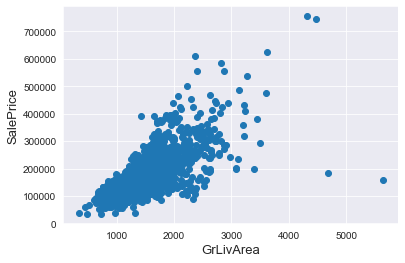

In [3]:
#---- Yi Yang

#exploring the outliers in the living area 
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


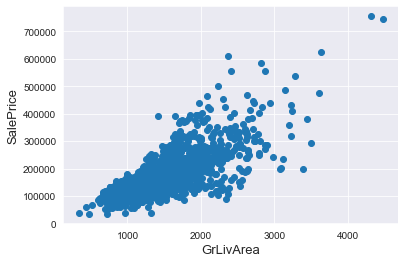

In [4]:
#---- Yi Yang

#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


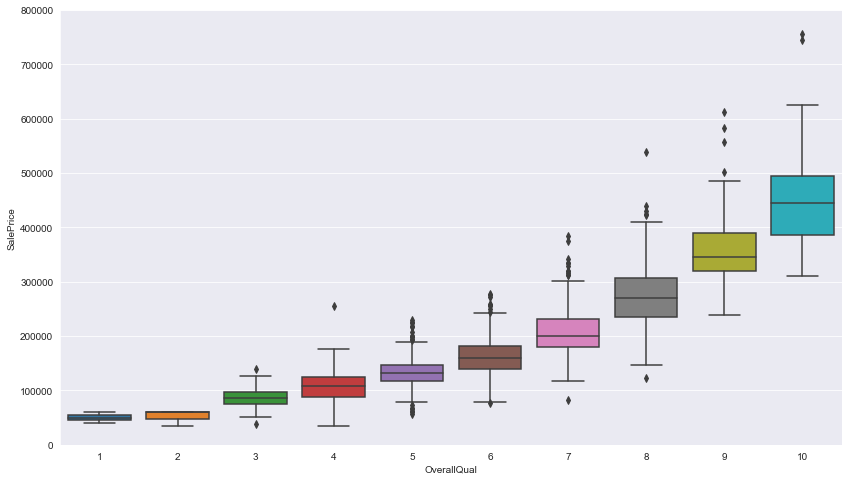

In [5]:
#------ CARLY

var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


 mu = 180932.92 and sigma = 79467.79



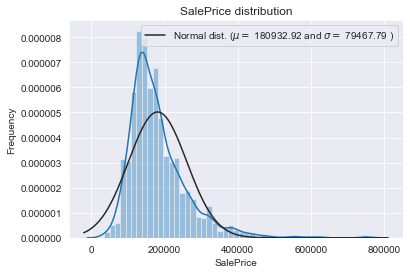

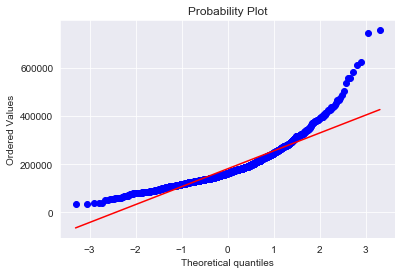

In [6]:
#------ CARLY

# Analysis on the target variable saleprice
sns.distplot(train['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

>The target variable is right skewed. As (linear) models perform better with normally distributed data , we need to transform this variable and make it more normally distributed.

> We use log transformation for the target variable


 mu = 12.02 and sigma = 0.40



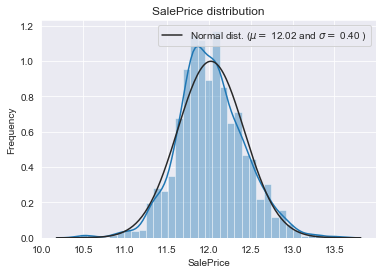

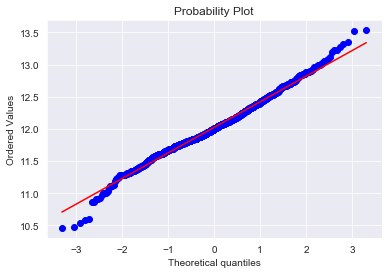

In [7]:
#------ CARLY

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

> Let's concatenate the train data (without the target variable) and test data into the same dataframe.

> We combine them because ML models are not so good at extrapolation and so the test data has to be well represented for reliable predictions

In [8]:
#------ GOUTAM

# storing the sale price column in y_train array  
y_train = train.SalePrice.values

# appending the train and test data 
all_data = pd.concat((train, test)).reset_index(drop=True)

# dropping the sale price column
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [9]:
#-----GOUTAM

# checking for the null values in the data 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

# dropping rows that do not have null values
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

#storing the top 30 missing columns into a dataframe
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

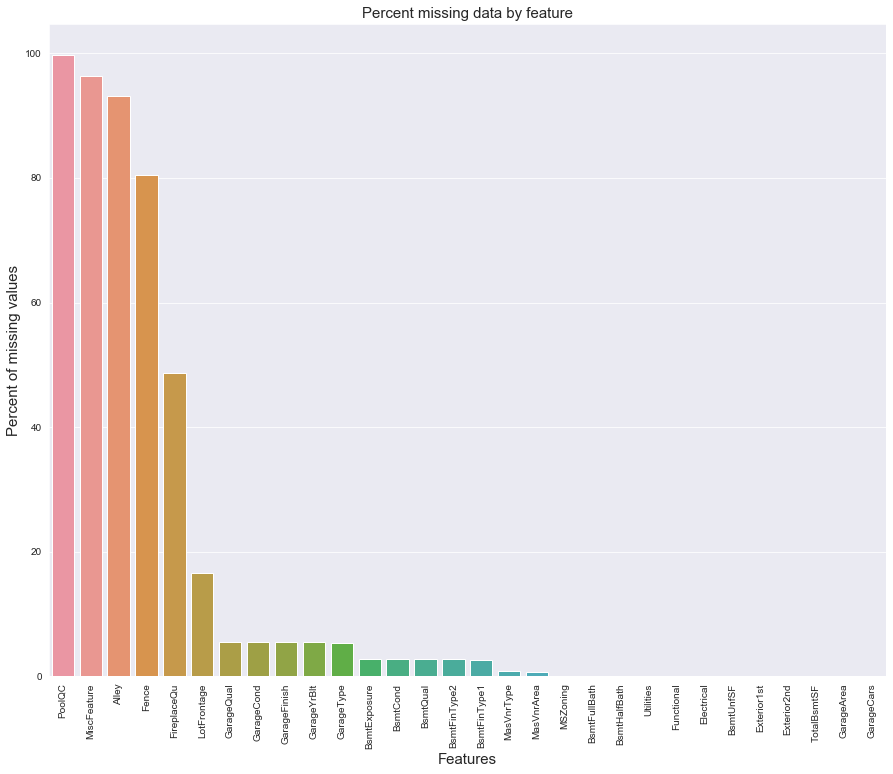

In [10]:
#------ CARLY

# plotting the missing values in the columns as a percentage

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

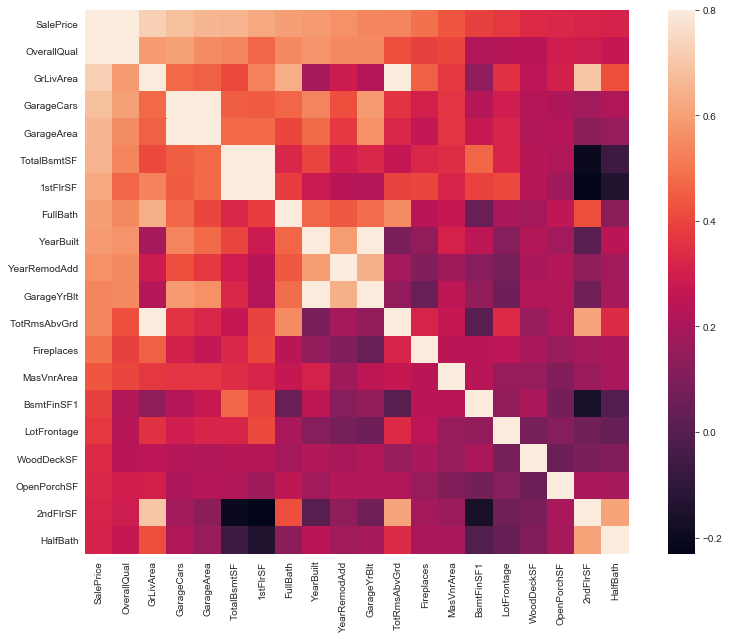

In [11]:
#------ CARLY

#Order the variables in order of correlation
corrmat = train.corr()

k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(train[cols].corr(), vmax=.8, square=True);

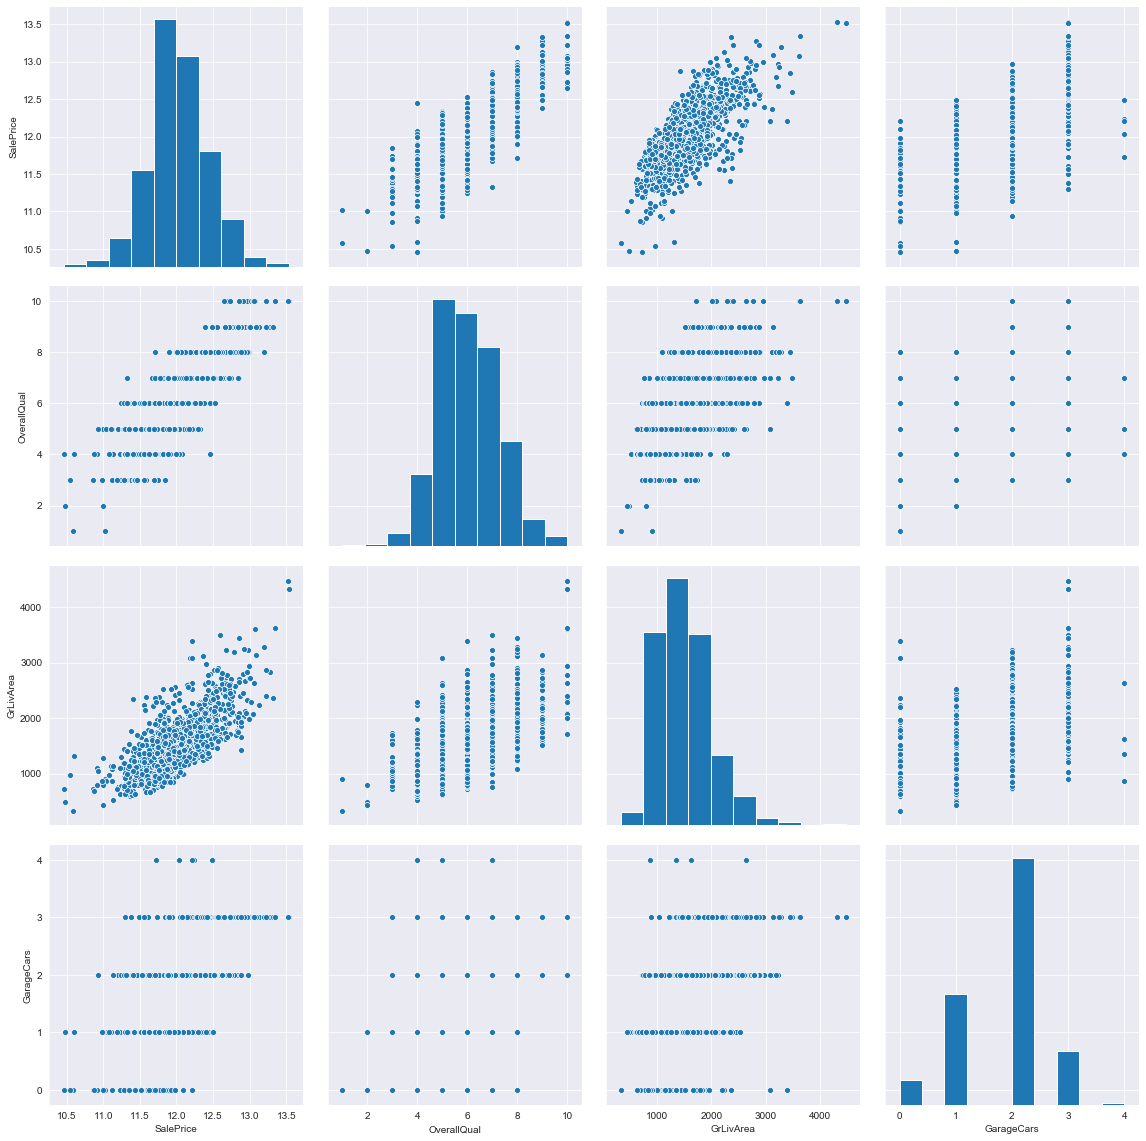

In [12]:
#------ CARLY

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(train[cols], height = 4);

## Imputing missing values

> Imputing the categorical columns with MODE of the neighborhood

In [13]:
#-----GOUTAM

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MSSubClass','SaleType','GarageYrBlt','MSZoning','Electrical','KitchenQual','BsmtQual','Exterior1st','Exterior2nd', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "MasVnrType", "FireplaceQu"):
    all_data[col] = all_data.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.mode()[0]))

> Imputing with 'None'

In [14]:
#-----GOUTAM

for col in ("Alley","MiscFeature","PoolQC",'Fence'):
    all_data[col] = all_data[col].fillna('None')

> Imputing numerical columns with MEDIAN of the neighborhood

In [15]:
#-----GOUTAM

for col in ("MasVnrArea", 'LotFrontage','GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.median()))

> The records in utilities categorical feature are all "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. So we can safely remove it.


In [16]:
#-----GOUTAM

all_data = all_data.drop(['Utilities'], axis=1)

In [17]:
#-----GOUTAM

all_data["Functional"] = all_data["Functional"].fillna("Typ")

# *Feature engineering*

In [18]:
#----- LING

# There is a natural order in their values for few categories, so converting them to numbers gives more meaning
quality_map = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
quality_cols = ['BsmtQual', 'BsmtCond','ExterQual', 'ExterCond','FireplaceQu','GarageQual', 'GarageCond','KitchenQual','HeatingQC']
for col in quality_cols:
    all_data[col] = all_data[col].replace(quality_map)

all_data['BsmtExposure'] = all_data['BsmtExposure'].replace({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3})

all_data["PavedDrive"] =all_data["PavedDrive"].replace({"N" : 0, "P" : 1, "Y" : 2})


bsmt_ratings = {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
bsmt_col = ['BsmtFinType1','BsmtFinType2']
for col in bsmt_col:
    all_data[col] = all_data[col].replace(bsmt_ratings)


In [19]:
#----- LING

# creating more relevant variables for arriving at better features  

all_data["OverallScore"]   = all_data["OverallQual"] * all_data["OverallCond"]
all_data["GarageScore"]    = all_data["GarageQual"] * all_data["GarageCond"]
all_data["ExterScore"]     = all_data["ExterQual"] * all_data["ExterCond"]

In [20]:
#----- LING

# Check remaining missing values if any

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [21]:
#----- LING

# MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [22]:
#----- LING

# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# *Data Modelling*

In [23]:
#------- SRAVAN ROY

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [24]:
#------ SRAVAN ROY

# removing the skewness in the columns with more than 0.5 skewness

skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 48 skewed numerical features to Box Cox transform


In [25]:
#------SRAVAN ROY

# converting the remaining categorical columns into dummy variables
all_data = pd.get_dummies(all_data)
ntrain = train.shape[0]
ntest = test.shape[0]
train = all_data[:ntrain]
test = all_data[ntrain:]

In [26]:
#------SRAVAN ROY

# importing the required libraries
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import lightgbm 

### Model Selections with best parameters

In [27]:
#------SRAVAN ROY

# Light Gradient Boosting 
lgb = lightgbm.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
# Gradient Boosting 
GBoost = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.05,
                                   max_depth=100, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

# Elastic Net 8.15
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

## Stacking the regression models


### Fit each of the base model 

In [28]:
#------SRAVAN ROY

models = [GBoost, lgb, ENet]
for model in models:
    model.fit(train, y_train)

### Average the predictions from each model to reduce overfitting

In [29]:
#------SRAVAN ROY

# averaging the predictions on the test set
final_pred = (lgb.predict(test) + GBoost.predict(test) + ENet.predict(test))/3

## Check the MAPE on test set

In [30]:
#------SRAVAN ROY

# Unlog the target variable to get the original values
stacked_pred = np.expm1(final_pred)

#creation of final submission dataframe
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = stacked_pred

p = sub
o = pd.read_csv('C:/Users/User/Desktop/test_actual_price.csv')
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape_err = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual']) * 100
print("MAPE for the stacked models:")
print(mape_err)

MAPE for the stacked models:
7.637017027243647


## FinalSubmission

In [31]:
#------SRAVAN ROY

# exporting the submission data to a csv file
sub.to_csv("submission.csv" , index=False)